# *The purpose of this project is to showcase the measureables of our team, including certification scores, call coaching stats, and quality of new hire stats. All statistics are stored in a secure SQL database that I can not grant access to for testing the final project, but I utilized SQL to pull info from the database and created csv files from those queries. Utilizing Python to clean data and do a few visualizations here before doing visualizations in Tableau.*

## **First step is to pull the data from SQL database.**

<p>Refer to SQL file: cert_pull_sql.sql, call_coach_pull.sql, qnh_pull.sql</p> 

## **Pulling in all needed dbs**

In [1]:
import pandas as pd 
import numpy as np
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk

# **Next step is to clean up the files.**
<p> *For security purposes, the names in my file have already changed and been added to the original csv.* </p>

## **Cleaning up Certification CSV:**

#### For the certification scores files, I need to first randomize the names in the first column for security purposes:

In [2]:
file_path = r"All Certs_Clean.csv"

# Read the CSV file into a DataFrame
cert = pd.read_csv(file_path)

# Randomize the names in the first column
fake = Faker()
cert['Employee'] = [fake.name() for _ in range(len(cert))]


# Display the DataFrame
print(cert['Employee'].head())


0        Bobby Patel
1    Jonathan Miller
2       John Aguirre
3        Mindy Downs
4    Daniel Gonzalez
Name: Employee, dtype: object


##### Next, I need to split the "Assessment" column into two individual columns:

In [3]:
# Split the 'Assessment' column based on a comma delimiter
cert[['Product', 'Assessment']] = cert['Assessment'].str.split(',', expand=True)

print(cert.head())



   Employee ID         Employee                     Assessment Score  \
0            1      Bobby Patel  Core Certification Assessment   87%   
1            2  Jonathan Miller  Core Certification Assessment   59%   
2            3     John Aguirre  Core Certification Assessment  100%   
3            4      Mindy Downs  Core Certification Assessment   84%   
4            5  Daniel Gonzalez  Core Certification Assessment   91%   

  Date Completed Product  
0     10/20/2023    RM12  
1     10/19/2023    RM12  
2     10/17/2023    RM12  
3     10/13/2023    RM12  
4     10/13/2023    RM12  


##### Adjusting the score column so I can convert it to an integer. Splitting based on % and then dropping that column:

In [4]:
# Split the 'Score' based on a % delimiter
cert[['Score', 'Drop']] = cert['Score'].str.split('%', expand=True)

# Drop the 'Drop' column created from the split
cert = cert.drop(columns=['Drop'])

print(cert['Score'].head())

0     87
1     59
2    100
3     84
4     91
Name: Score, dtype: object


##### Converting score column to an integer and adding a new column Pass/Fail based on score >79:

In [5]:
# Convert the 'Score' to integers
cert['Score'] = cert['Score'].astype(int)

# Add a new column 'Pass/Fail' for scores over 79
cert['Pass/Fail'] = cert['Score'] > 79

print(cert['Pass/Fail'].head())

0     True
1    False
2     True
3     True
4     True
Name: Pass/Fail, dtype: bool


##### Adding one last column of either 1 or 0 to make visualization easier in Tableau:

In [6]:
# Add a new column 'Sum' with 1 if 'Score' > 79 else 0
cert['Sum'] = cert['Score'].apply(lambda x: 1 if x > 79 else 0)
print(cert['Sum'].head())

0    1
1    0
2    1
3    1
4    1
Name: Sum, dtype: int64


#### Dropping all unnecessary columns

In [7]:
cert = cert.drop(['Employee','Date Completed'], axis=1)
print(cert.head())

   Employee ID                     Assessment  Score Product  Pass/Fail  Sum
0            1  Core Certification Assessment     87    RM12       True    1
1            2  Core Certification Assessment     59    RM12      False    0
2            3  Core Certification Assessment    100    RM12       True    1
3            4  Core Certification Assessment     84    RM12       True    1
4            5  Core Certification Assessment     91    RM12       True    1


## **Cleaning up Call Coaching CSV:**

#### First, randomize the names:

In [8]:
file_path1 = r"call_coaching_2023_scores.csv"

# Read the CSV file into a DataFrame
call = pd.read_csv(file_path1)

# Randomize the names in the first column
fake = Faker()
call['Employee'] = [fake.name() for _ in range(len(call))]


# Display the DataFrame
print(call['Employee'].head())

0       Robert Long
1    Amanda Mercado
2      Tyrone Meyer
3    Elizabeth Hall
4     Angela Taylor
Name: Employee, dtype: object


#### Next, find the nulls:

In [9]:
#Check for any nulls
call.isnull().any()

Employee ID    False
Employee       False
Queue          False
Q1 - Call 1     True
Q1 - Call 2     True
Q2 - Call 1     True
Q2 - Call 2     True
Q3 - Call 1     True
Q3 - Call 2     True
Q4 - Call 1     True
Q4 - Call 2     True
Scheduled       True
dtype: bool

In [10]:
#Sum nulls in every column
call.isnull().sum()

Employee ID     0
Employee        0
Queue           0
Q1 - Call 1    70
Q1 - Call 2    70
Q2 - Call 1    73
Q2 - Call 2    74
Q3 - Call 1    73
Q3 - Call 2    73
Q4 - Call 1    99
Q4 - Call 2    99
Scheduled      69
dtype: int64

#### Dropping rows where all scores are null:

In [11]:
#Dropping rows that are null across every column aside from column 1 and 2
call = call.dropna(subset=call.columns[3:], how='all')

print(call.head())

   Employee ID          Employee      Queue  Q1 - Call 1  Q1 - Call 2  \
2            3      Tyrone Meyer  Technical         96.0         96.0   
3            4    Elizabeth Hall  Technical         98.0         96.0   
4            5     Angela Taylor  Technical        100.0         94.0   
5            6       Sandra King  Technical          NaN          NaN   
6            7  Kimberly Sanders  Technical          NaN          NaN   

   Q2 - Call 1  Q2 - Call 2  Q3 - Call 1  Q3 - Call 2  Q4 - Call 1  \
2         96.0        100.0          NaN          NaN          NaN   
3         96.0         98.0        100.0        100.0          NaN   
4        100.0        100.0          NaN          NaN          NaN   
5          NaN          NaN         92.0         96.0          NaN   
6         94.0         88.0         98.0         86.0          NaN   

   Q4 - Call 2 Scheduled  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN  
5          NaN       NaN  
6    

#### Rechecking null values:

In [12]:
#Sum nulls for each column
call.isnull().sum()

Employee ID     0
Employee        0
Queue           0
Q1 - Call 1    38
Q1 - Call 2    38
Q2 - Call 1    41
Q2 - Call 2    42
Q3 - Call 1    41
Q3 - Call 2    41
Q4 - Call 1    67
Q4 - Call 2    67
Scheduled      37
dtype: int64

#### Adding a column for average score:

In [13]:
# Define the columns containing call scores
call_score_columns = call.columns[4:11]

#Add Avg Score column that is the average of all non null values
call['Avg Score'] = call[call_score_columns].mean(axis=1, skipna=True)

print(call['Avg Score'].head())

2    97.333333
3    98.000000
4    98.000000
5    94.000000
6    91.500000
Name: Avg Score, dtype: float64


#### Dropping all unnecessary columns

In [14]:
call = call.drop(call.columns[[3,4,5,6,7,8,9,10]], axis=1)
print(call.head())

   Employee ID          Employee      Queue Scheduled  Avg Score
2            3      Tyrone Meyer  Technical       NaN  97.333333
3            4    Elizabeth Hall  Technical       NaN  98.000000
4            5     Angela Taylor  Technical       NaN  98.000000
5            6       Sandra King  Technical       NaN  94.000000
6            7  Kimberly Sanders  Technical       Yes  91.500000


## **Cleaning up Quality of New Hire CSV:**

#### First need to randomize the names:

In [15]:
file_path2 = r"QNH_11_17_23.csv"

# Read the CSV file into a DataFrame
qnh = pd.read_csv(file_path2)

# Randomize the names in the first column
fake = Faker()
qnh['Employee'] = [fake.name() for _ in range(len(qnh))]


# Display the DataFrame
print(qnh['Employee'].head())

0        Tonya Decker
1    Darlene Peterson
2         Kelly White
3      Donald Manning
4        Lance Dillon
Name: Employee, dtype: object


#### Convert all scores to integers:

In [16]:
qnh['QNH Foundations Coach Survey'] = pd.to_numeric(qnh['QNH Foundations Coach Survey'], errors='coerce').astype('Int64')
qnh['CORE Certification First Result'] = pd.to_numeric(qnh['CORE Certification First Result'], errors='coerce').astype('Int64')
qnh['QNH 45 Day Employee Survey'] = pd.to_numeric(qnh['QNH 45 Day Employee Survey'], errors='coerce').astype('Int64')
qnh['QNH 45 Day Coach Survey'] = pd.to_numeric(qnh['QNH 45 Day Coach Survey'], errors='coerce').astype('Int64')
qnh['QNH 90 Day Employee Survey'] = pd.to_numeric(qnh['QNH 90 Day Employee Survey'], errors='coerce').astype('Int64')
qnh['QNH 90 Day Lead Survey'] = pd.to_numeric(qnh['QNH 90 Day Lead Survey'], errors='coerce').astype('Int64')
qnh['QNH 180 Day Employee Survey'] = pd.to_numeric(qnh['QNH 180 Day Employee Survey'], errors='coerce').astype('Int64')
qnh['QNH 180 Day Lead Survey'] = pd.to_numeric(qnh['QNH 180 Day Lead Survey'], errors='coerce').astype('Int64')
qnh['QNH 270 Day Employee Survey'] = pd.to_numeric(qnh['QNH 270 Day Employee Survey'], errors='coerce').astype('Int64')
qnh['QNH 270 Day Lead Survey'] = pd.to_numeric(qnh['QNH 270 Day Lead Survey'], errors='coerce').astype('Int64')


print(qnh.head())

   Employee ID          Employee Gender               Coach  ActiveStartDate  \
0            1      Tonya Decker      F       Sabrina Clore       10/12/2009   
1            2  Darlene Peterson      F                 LCS        1/23/2012   
2            3       Kelly White      M        Don Paquette        7/11/2016   
3            4    Donald Manning      F     Human Resources         1/3/2017   
4            5      Lance Dillon      F  Account Management        8/18/2014   

        Department  QNH Foundations Coach Survey  \
0  Product Support                            80   
1              PDC                            88   
2  Product Support                          <NA>   
3               HR                          <NA>   
4              LCS                          <NA>   

   CORE Certification First Result  QNH 45 Day Employee Survey  \
0                               95                          59   
1                               50                         100   
2       

#### Adding a new column to calculate Quality of New Hire Score:

In [17]:
# Define the columns containing qnh scores
qnh_score_columns = qnh.columns[6:16]

#Add QNH Score column that is the average of all non null values
qnh['QNH Score'] = qnh[qnh_score_columns].mean(axis=1, skipna=True)

print(qnh['QNH Score'].head())

0    74.7
1    82.6
2    <NA>
3    <NA>
4    <NA>
Name: QNH Score, dtype: object


#### Adding an additional "Outcome" column based on QNH Score:

In [18]:
qnh_scores = qnh['QNH Score']

# Add a new column 'Outcome' based on the QNH scores
qnh['Outcome'] = np.where(qnh_scores > 79, 'Met QNH', np.where(qnh_scores.notna(), 'Not Met QNH', '<NA>'))

# Display the updated DataFrame
print(qnh['Outcome'].head())

0    Not Met QNH
1        Met QNH
2           <NA>
3           <NA>
4           <NA>
Name: Outcome, dtype: object


#### Dropping null outcomes

In [19]:
#Dropping rows that have null outcome
qnh = qnh.drop(qnh[qnh['Outcome'] == '<NA>'].index)
print(qnh['Outcome'].head())

0     Not Met QNH
1         Met QNH
49        Met QNH
53        Met QNH
60        Met QNH
Name: Outcome, dtype: object


#### Dropping unnecessary columns

In [21]:
qnh = qnh.drop(qnh.columns[[1,6,7,8,9,10,11,12,13,14,15,16]], axis=1)
print(qnh.head())


    Employee ID Gender          Coach  ActiveStartDate        Department  \
0             1      F  Sabrina Clore       10/12/2009   Product Support   
1             2      F            LCS        1/23/2012               PDC   
49           50      F  Morgan Walker       11/11/2019  Customer Success   
53           54      M   Don Paquette         1/7/2019    Implementation   
60           61      M            LCS         2/3/2020               PDC   

   Date of Termination QNH Score      Outcome  
0                  NaN      74.7  Not Met QNH  
1                  NaN      82.6      Met QNH  
49                 NaN      87.0      Met QNH  
53                 NaN      97.0      Met QNH  
60                 NaN      98.0      Met QNH  


#### Calculating length of service and adding as column:

In [22]:
import datetime as dt

# Convert date columns to datetime objects
qnh[' ActiveStartDate'] = pd.to_datetime(qnh[' ActiveStartDate'])
qnh['Date of Termination'] = pd.to_datetime(qnh['Date of Termination'])

# Calculate length of service in years
qnh['Length of Service'] = ((qnh['Date of Termination'].dt.year - qnh[' ActiveStartDate'].dt.year) + \
                           ((qnh['Date of Termination'].dt.month - qnh[' ActiveStartDate'].dt.month) / 12)).round(2)

# If 'Date of Termination' is null, calculate the length of service until today's date
today = dt.datetime.today()

qnh['Length of Service'].fillna(((today.year - qnh[' ActiveStartDate'].dt.year) +
                               ((today.month - qnh[' ActiveStartDate'].dt.month) / 12)).round(2), inplace=True)


# Display the updated new column
print(qnh['Length of Service'].head())

0     14.17
1     11.92
49     4.08
53     4.92
60     3.83
Name: Length of Service, dtype: float64


## **Merging the three dataframes together**

In [23]:
# Merge dataframes
result1 = pd.merge(cert, call, on=['Employee ID'], how='left')
result = pd.merge(result1, qnh, on=['Employee ID'], how='left')


# Display the merged dataframe
print(result)

     Employee ID                     Assessment  Score Product  Pass/Fail  \
0              1  Core Certification Assessment     87    RM12       True   
1              2  Core Certification Assessment     59    RM12      False   
2              3  Core Certification Assessment    100    RM12       True   
3              4  Core Certification Assessment     84    RM12       True   
4              5  Core Certification Assessment     91    RM12       True   
..           ...                            ...    ...     ...        ...   
744           52   FBM Certification Assessment     70    RM12      False   
745           53   FBM Certification Assessment     95    RM12       True   
746           54   FBM Certification Assessment     97    RM12       True   
747           55   FBM Certification Assessment     41    RM12      False   
748           56   FBM Certification Assessment     90    RM12       True   

     Sum         Employee      Queue Scheduled  Avg Score Gender  \
0      

## **Saving merged files to csv file for use in Tableau**

In [24]:
# Save the DataFrame to a new CSV file
output_file_path = 'hr_data.csv'
result.to_csv(output_file_path, index=False)

# **Some visualizations with python:**

## **Certification Visualizations:**

#### Creating pivot table to display amount of certifications passed by Assessment. This will allow us to forecast how many pins we need to order per assessment for next year.

In [25]:
pivot = cert.pivot_table(index =['Assessment'], 
                       values =['Sum'], 
                       aggfunc ='sum') 
print(pivot) 

                                          Sum
Assessment                                   
Bookkeeping Certification                  96
Core Certification Assessment             135
FBM Certification Assessment               52
Owners and Finance Queue                   40
RM Certification: General Knowledge        84
RM Certification: Integrations Knowledge   51
RM Certification: Mobile Knowledge         60
RM Certification: Technical Knowledge      80
Scripting Certification Assessment         23


#### Checking the distribution of certification scores among employees. This helps us to get an overall look at how employees are scoring on certifications.

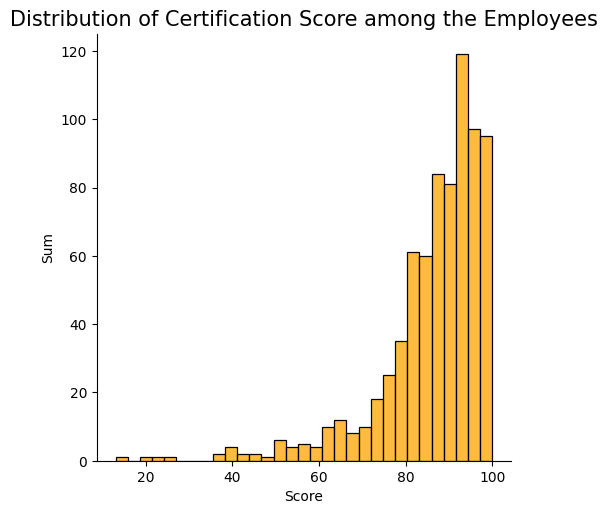

In [26]:
plt.rcParams['figure.figsize'] = (15, 7)
sns.displot(cert['Score'], color = 'orange')
plt.title('Distribution of Certification Score among the Employees', fontsize = 15)
plt.xlabel('Score', fontsize = 10)
plt.ylabel('Sum', fontsize = 10)
plt.show()  

#### Visualizing overall Pass vs Fail. 

In [27]:
#Switching the true false output from boolean to strings for Pass or Fail labels
cert['Pass/Fail'] = cert['Pass/Fail'].replace({True: 'Pass', False: 'Fail'})
print(cert['Pass/Fail'].head())

0    Pass
1    Fail
2    Pass
3    Pass
4    Pass
Name: Pass/Fail, dtype: object


In [28]:
#counting pass vs fail certifications
cert['Pass/Fail'].value_counts()

Pass/Fail
Pass    621
Fail    128
Name: count, dtype: int64

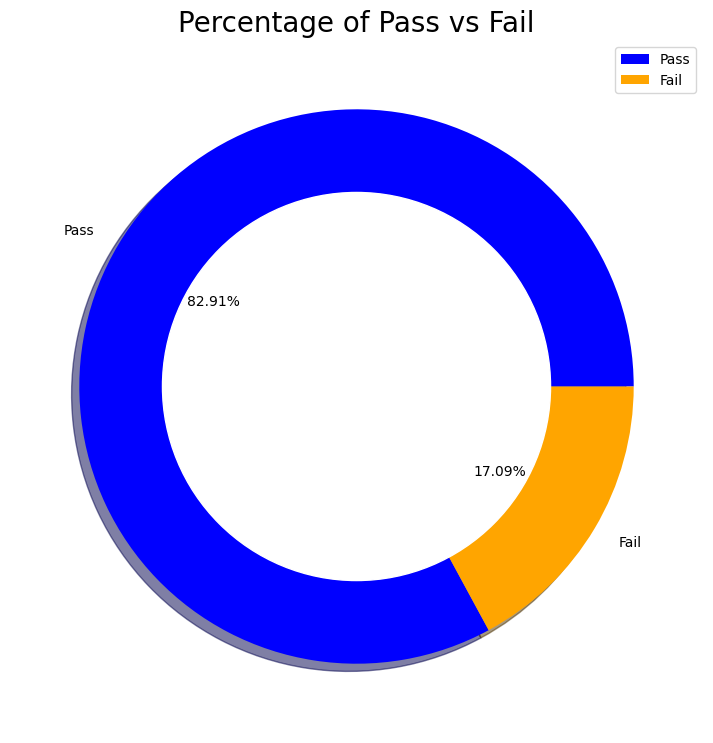

In [29]:
# plotting a donut chart for visualizing pass/fail

size = [621, 128]
colors = ['blue', 'orange']
labels = "Pass", "Fail"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Percentage of Pass vs Fail', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

#### Displaying scores per assessment:

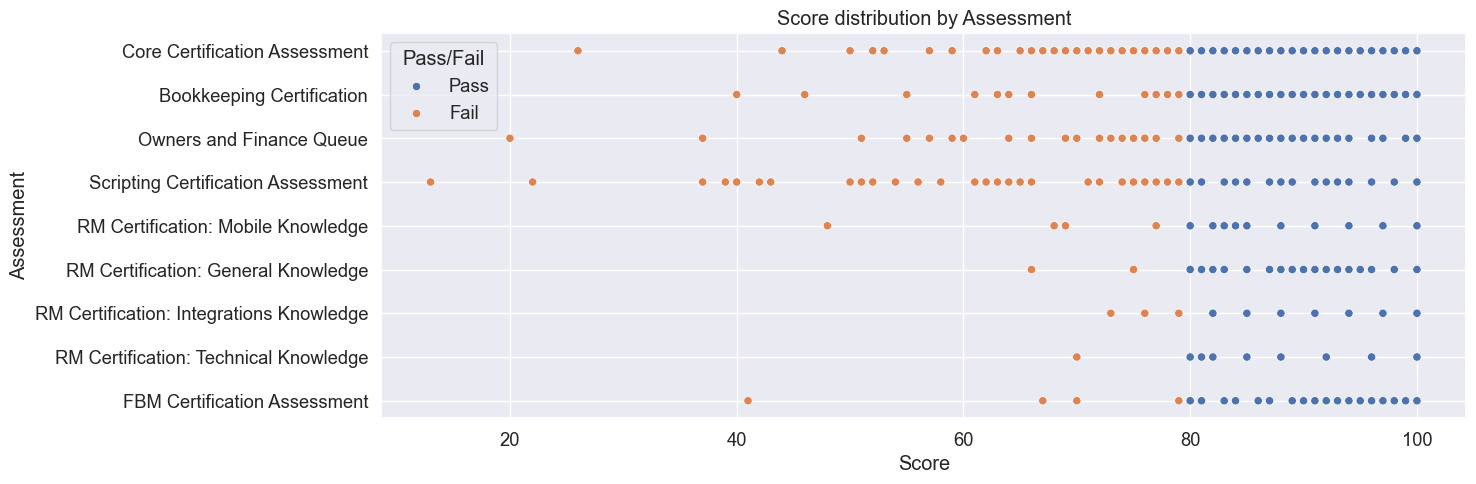

In [30]:
# set theme for plots
sns.set_theme(font_scale=1.2) 

# Create scatter plot
plt.figure(figsize=(14, 5))
sns.scatterplot(data=cert,
                x="Score",
                y="Assessment",
                hue="Pass/Fail"
               )

plt.title("Score distribution by Assessment")
plt.show()

#### Showing pass rate by call queue only assessments in bar graph. If the majority are passes, the queue training does a significant job of preparing empolyee for certification. If it is split, the training should be adjusted. If the majority fail, the assessment should be adjusted. 

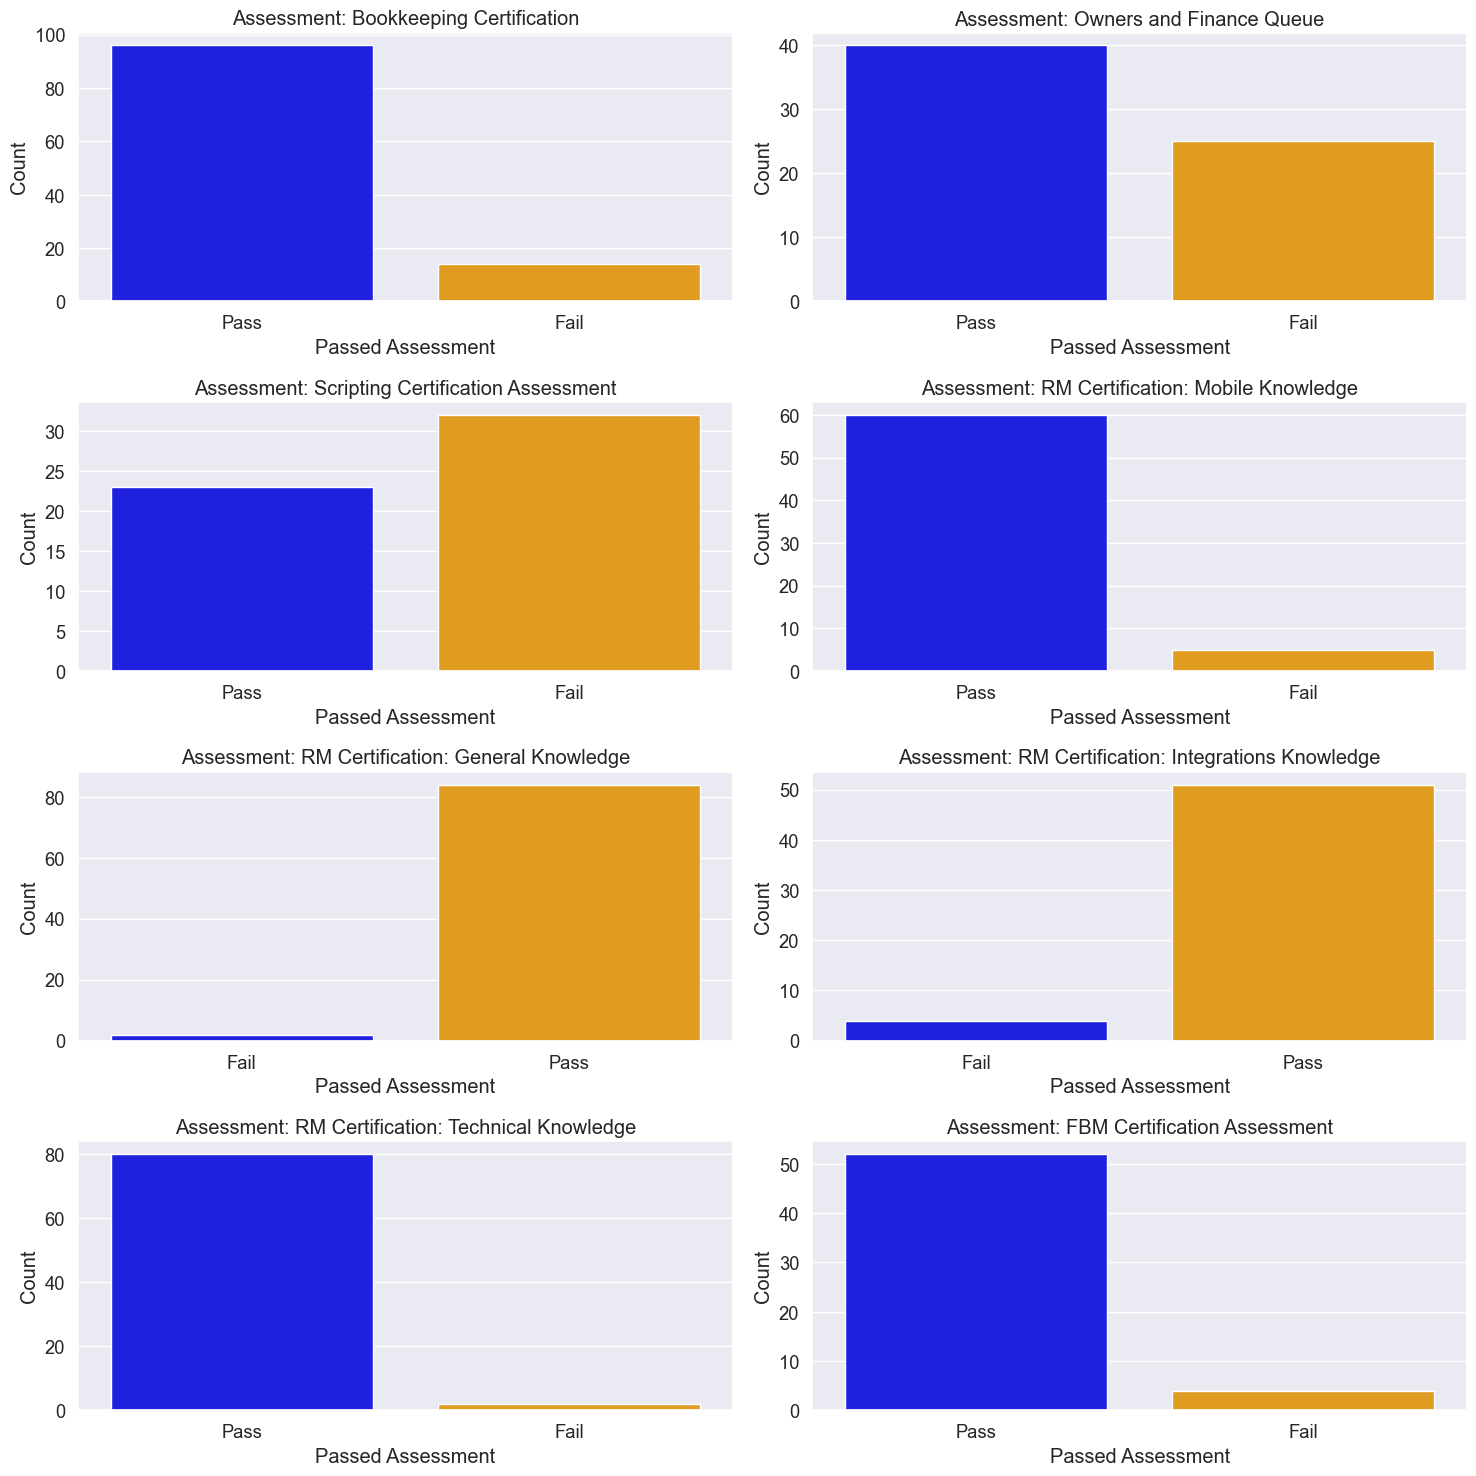

In [31]:
# Select only queue certifications
unique_assessments = cert['Assessment'].unique()[1:9]  

# Set up a 4x2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# Flatten the 4x2 array of subplots to simplify indexing
axes = axes.flatten()

# Define a color palette for the bars
colors = ['blue', 'orange']

for i, assessment in enumerate(unique_assessments):
    # Filter for the current assessment
    subset_df = cert[cert['Assessment'] == assessment]
    
    # Create a count plot for pass/fail for the current assessment
    sns.countplot(x='Pass/Fail', data=subset_df, ax=axes[i], hue='Pass/Fail', palette=colors, legend=False)
    
    # Set title for each subplot
    axes[i].set_title(f'Assessment: {assessment}')
    
    # Set labels
    axes[i].set_xlabel('Passed Assessment')
    axes[i].set_ylabel('Count')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

#### Visualizing pass rate for all certifications. This will help to determine the difficulty of the certifications and if more training needs to be created 

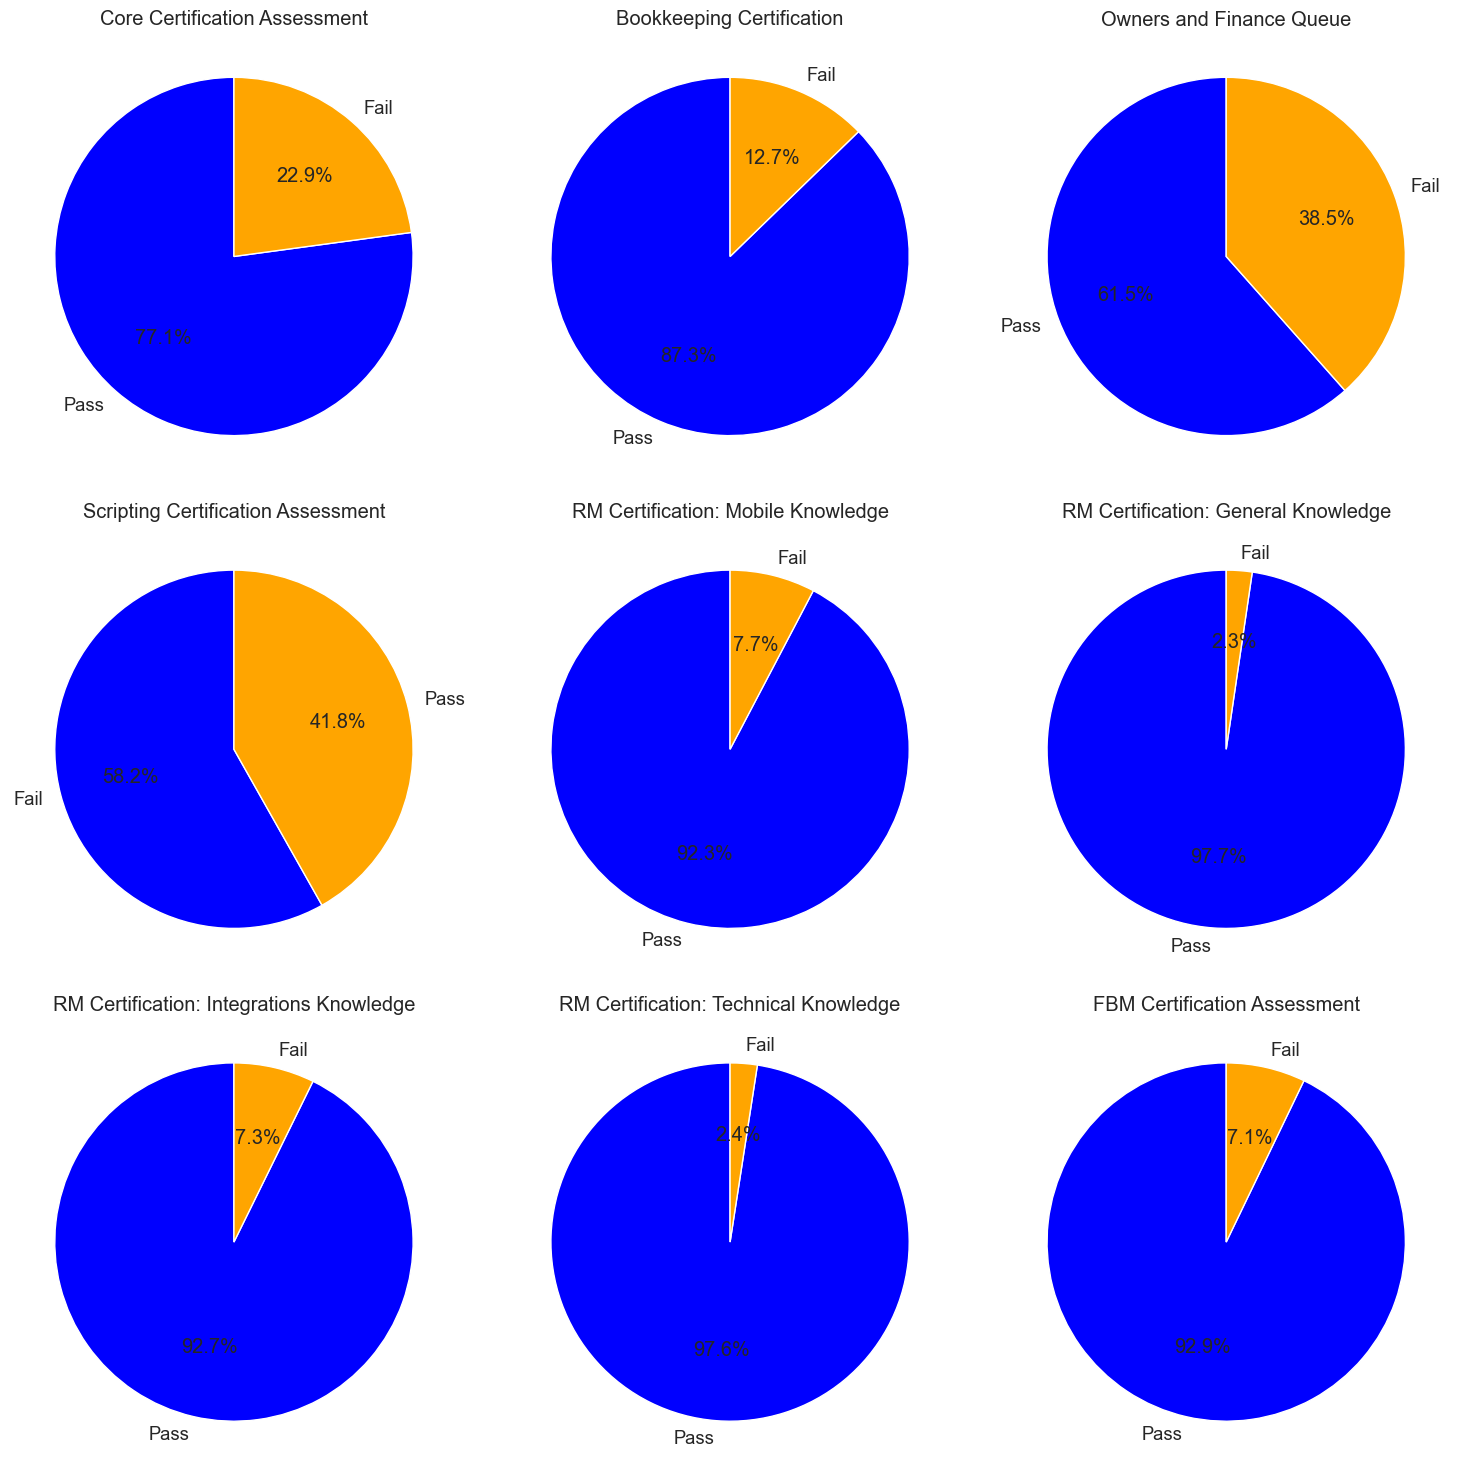

In [32]:
# Select all certifications
all_assessments = cert['Assessment'].unique()[:10]  

# Set up a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the 3x3 array of subplots to simplify indexing
axes = axes.flatten()

# Define colors for 'Pass' and 'Fail'
pass_color = 'blue'
fail_color = 'orange'

for i, assessment in enumerate(all_assessments):
    # Filter the DataFrame for the current assessment
    subset_df = cert[cert['Assessment'] == assessment]
    
    # Count the number of pass and fail occurrences
    pass_fail_counts = subset_df['Pass/Fail'].value_counts()
    
    # Create a pie chart for pass rate for the current assessment
    colors = [pass_color, fail_color]  # Ensure 'Pass' is represented by blue and 'Fail' by orange
    axes[i].pie(pass_fail_counts, labels=pass_fail_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    
    # Set title for each subplot
    axes[i].set_title(f'{assessment}')

# Adjust layout for better readability
plt.tight_layout()

# Display the plots
plt.show()

## **Call Coaching Visualizations:**

#### Pulling in the list of upcoming call coachings and adding a checkbox next to each of them:
<p>This should show as a pop up display so we can check off evaluations as they are completed</p>

In [33]:
from tkinter import IntVar

names = call['Employee'].tolist()  

# Create a tkinter window
window = tk.Tk()
window.title("Names with Checkboxes")

# Create IntVar list to hold the checkbox states
checkbox_vars = [IntVar() for _ in names]

# Create and display checkboxes
for i, name in enumerate(names):
    checkbox = tk.Checkbutton(window, text=name, variable=checkbox_vars[i])
    checkbox.pack(anchor='w')

window.mainloop()

#### Call Coaching scores by queue. This will show us employee customer service success by queue and may help to identify lapses in call preparation. 

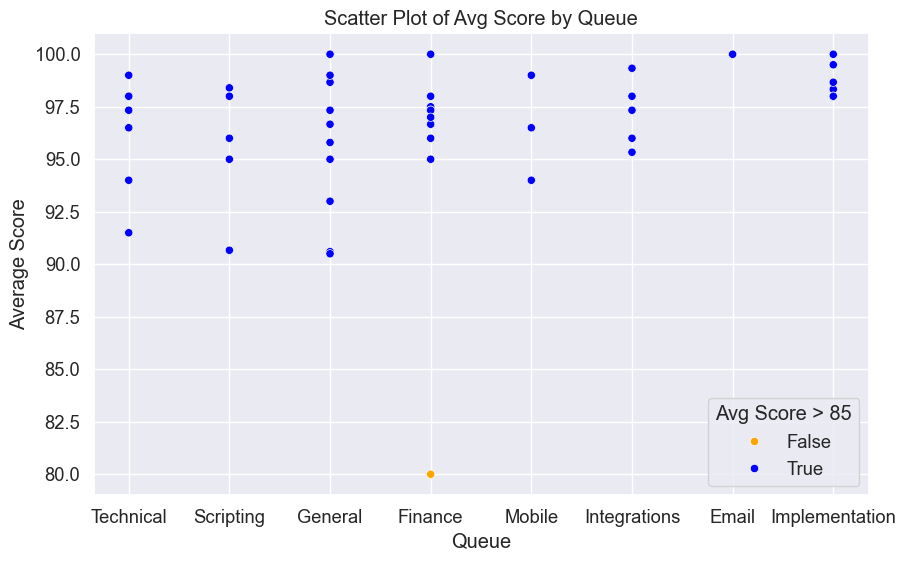

In [34]:
# Define a threshold for coloring points
threshold = 85

# Create a scatter plot of Avg Score by Queue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Queue', y='Avg Score', data=call, hue=call['Avg Score'] > threshold, palette={True: 'blue', False: 'orange'})

# Set labels and title
plt.xlabel('Queue')
plt.ylabel('Average Score')
plt.title('Scatter Plot of Avg Score by Queue')

# Display the legend
plt.legend(title='Avg Score > 85', loc='lower right')

# Display the plot
plt.show()

## **Quality of New Hire Visualizations:**

##### Word Art displaying most popular departments. This helps to identify recruitment trends 

In [35]:
department_list = " ".join(qnh['Department'].to_list())

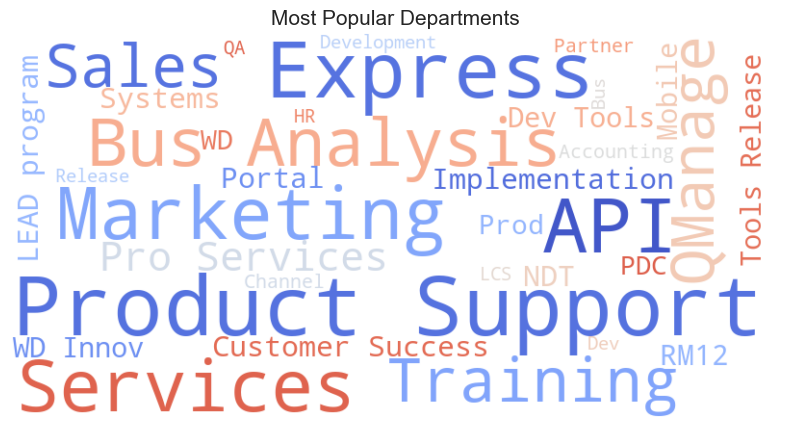

In [36]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

stopword = set(STOPWORDS)

# Generate the WordCloud with custom settings
wordcloud = WordCloud(
    background_color='white',
    colormap='coolwarm',  # Choose a colormap that includes blue and orange tones
    contour_color='black',
    contour_width=1,
    width=800,
    height=400,
    relative_scaling=0.1,  # Adjust the spacing between words
    random_state=42
).generate(department_list)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most Popular Departments', fontsize=15)
plt.axis('off')
plt.show()

#### Displaying length of service among employees. This helps to identify tenure

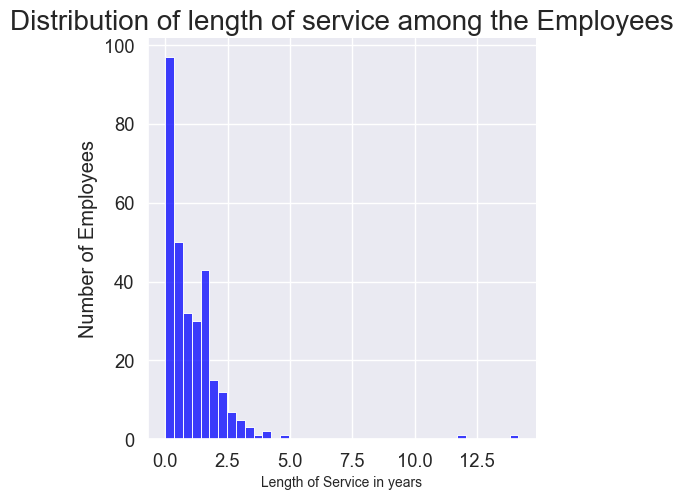

In [37]:
# displaying the distribution of length of service

sns.displot(qnh['Length of Service'], color = 'blue')
plt.title('Distribution of length of service among the Employees', fontsize = 20)
plt.xlabel('Length of Service in years', fontsize = 10)
plt.ylabel('Number of Employees')
plt.show()

#### Visualizing employees per Professional Development Coach. This helps to ensure resources are being appropriately divided and can indicate need for an additional coach.

In [38]:
# Output number of employees per coach
pivot = qnh.pivot_table(index =['Coach'], 
                       values =['Employee ID'], 
                       aggfunc ='count') 
print(pivot) 

                  Employee ID
Coach                        
Carrie Legner               3
Don Paquette               80
Jennifer Kephart           94
LCS                         2
Morgan Walker             116
Nick Geisen                 2
Sabrina Clore               3


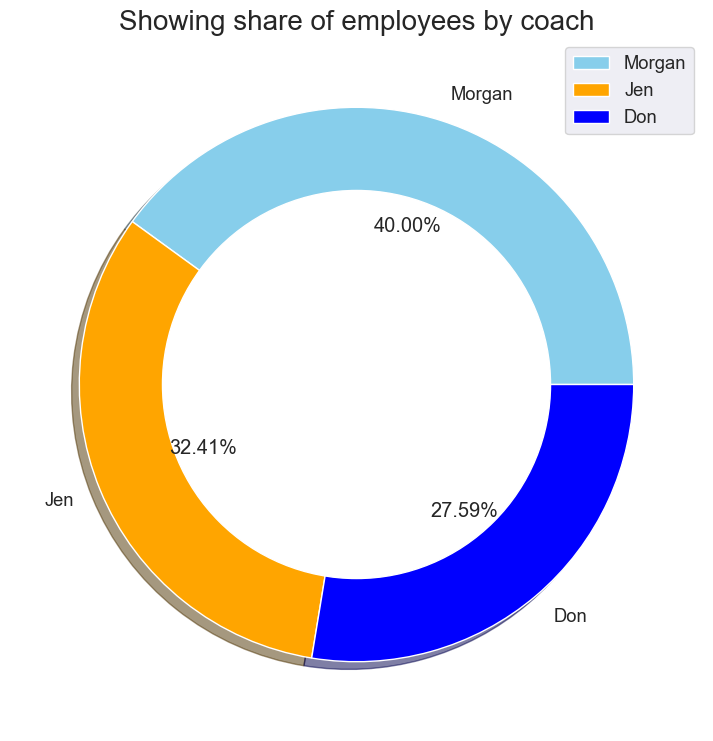

In [39]:
# plotting a donut chart for visualizing only HR coaches employee share

size = [116, 94, 80]
colors = ['skyblue', 'orange', 'blue']
labels = "Morgan", "Jen", "Don"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Showing share of employees by coach', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

#### Displaying the gender gap in the current employee count:

In [40]:
#creating picot table to output count
pivot = qnh.pivot_table(index =['Gender'], 
                       values =['Employee ID'], 
                       aggfunc ='count') 
print(pivot) 

        Employee ID
Gender             
F               123
M               177


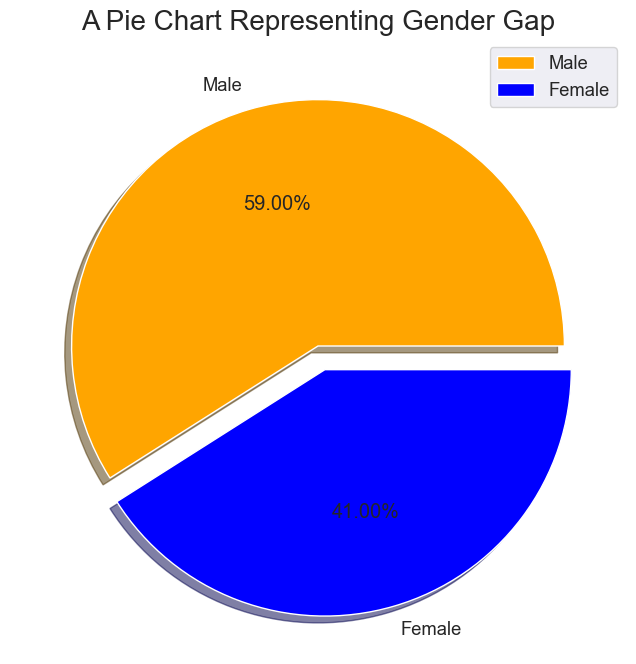

In [41]:
# plotting a pie chart

size = [177, 123]
labels = "Male", "Female"
colors = ['orange', 'blue']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
     

#### Displaying Quality of New hire statistics:

In [42]:
#count values of Met QNH and Not Met QNH
qnh['Outcome'].value_counts()

Outcome
Met QNH        251
Not Met QNH     49
Name: count, dtype: int64

#### The following pie chart displays the percentage of our employees who have not met the minimum quality of new hire requirements. The quality of new hire measure forecasts likelihood of turnover. This chart tells us to prepare for a possible 17% turnover rate 

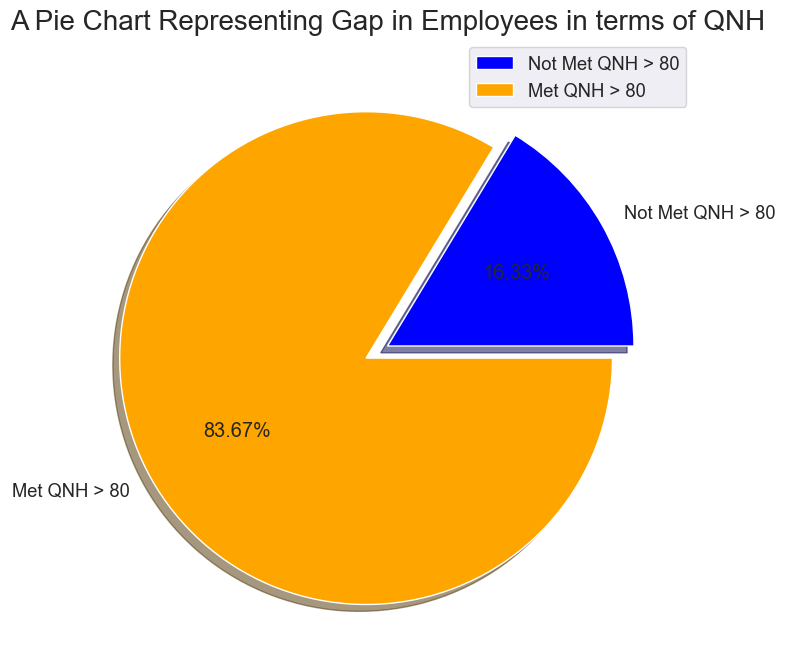

In [43]:
# plotting a pie chart
size = [49, 251]
labels = "Not Met QNH > 80", "Met QNH > 80"
colors = ['blue', 'orange']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (8, 8)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Gap in Employees in terms of QNH', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

#### The following graph displays our employee population and their overall quality within 10 point ranges. We can look more closely at the >99 range for possible promotions. 

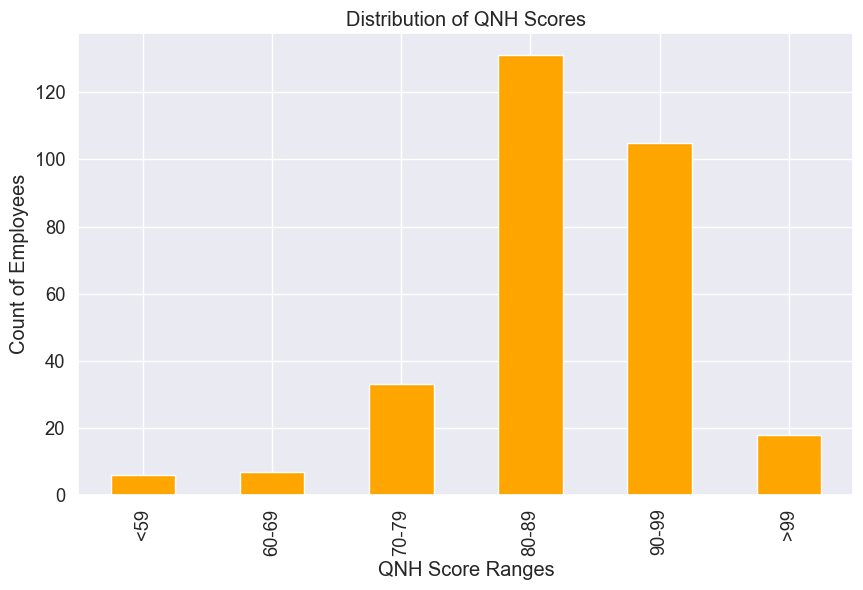

In [44]:
#Creating display for distribution of scores by range
qnh_scores_all = qnh['QNH Score']

# Filter out null or NA values
qnh_scores_all = qnh_scores_all.dropna()

# Define score ranges
score_ranges = [0, 59, 69, 79, 89, 99, float('inf')]
range_labels = ['<59', '60-69', '70-79', '80-89', '90-99', '>99']

# Categorize scores into ranges
qnh_score_bins = pd.cut(qnh_scores_all, bins=score_ranges, labels=range_labels, right=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
qnh_score_bins.value_counts().sort_index().plot(kind='bar', color='orange')

# Set labels and title
plt.xlabel('QNH Score Ranges')
plt.ylabel('Count of Employees')
plt.title('Distribution of QNH Scores')

# Display the plot
plt.show()

## Visualizations for the final result csv

#### Display what factor certification scores play in Quality of New Hire

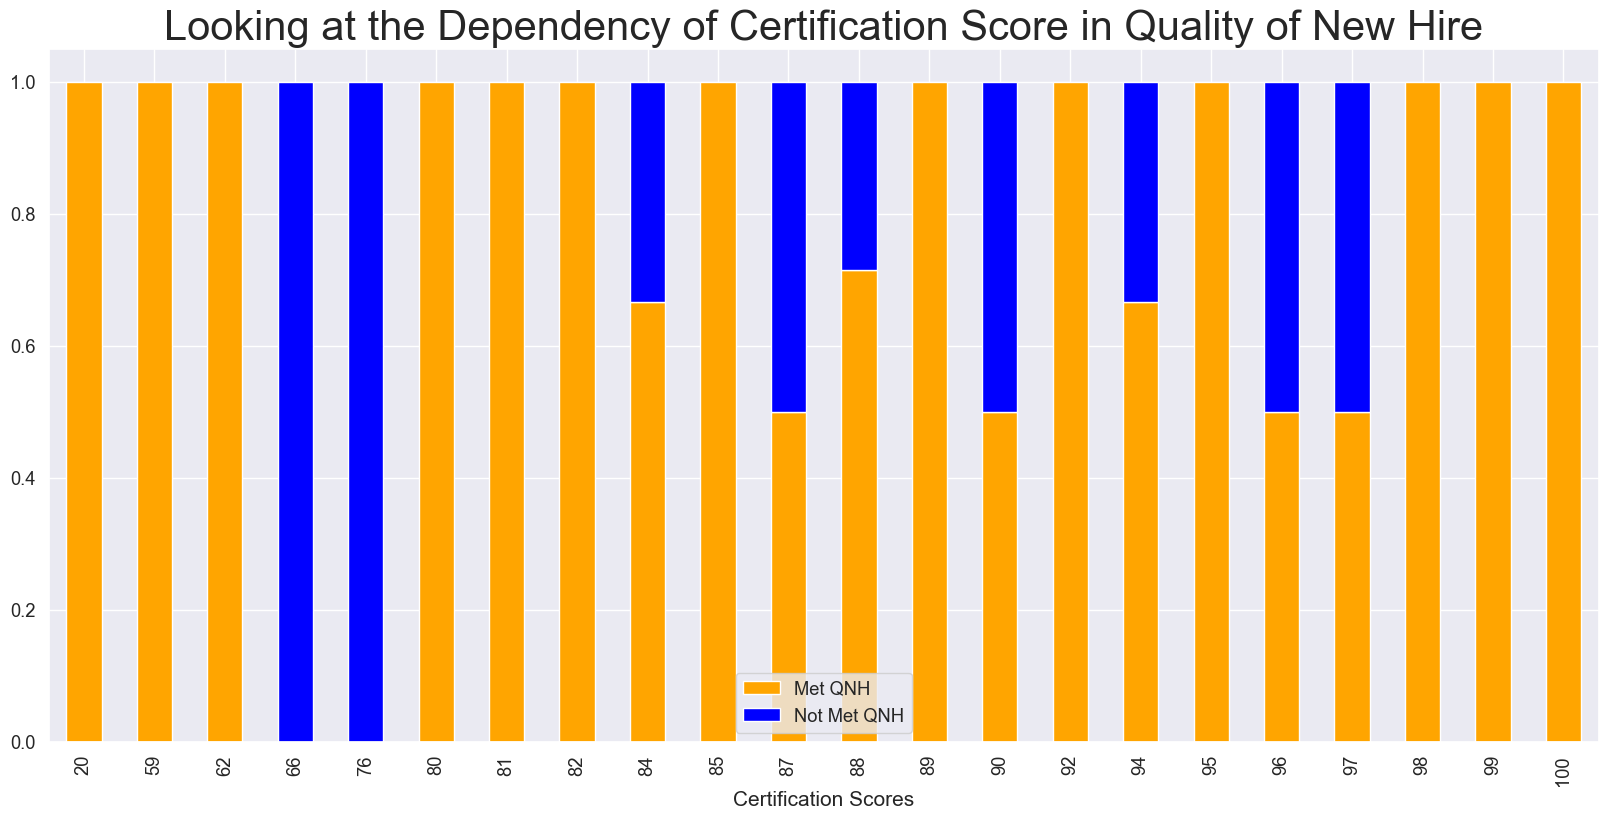

In [45]:
# scatter plot between average certification score and quality of new hire score

data = pd.crosstab(result['Score'], result['Outcome'])
data.div(data.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (20, 9), color = ['orange', 'blue'])

plt.title('Looking at the Dependency of Certification Score in Quality of New Hire', fontsize = 30)
plt.xlabel('Certification Scores', fontsize = 15)
plt.legend()
plt.show()

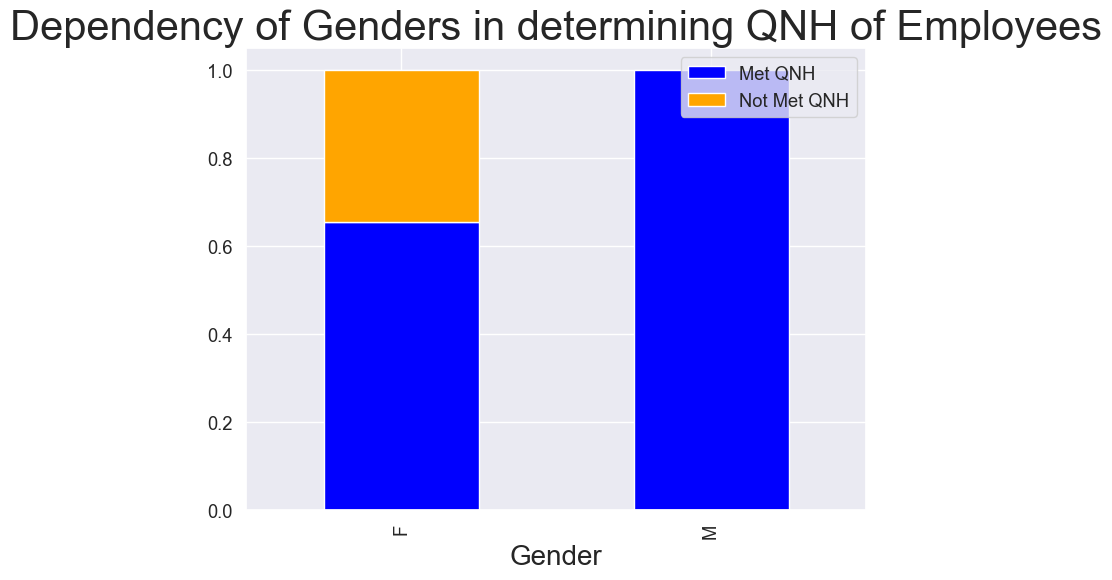

In [46]:
# checking dependency of gender over quality of new hire score

data = pd.crosstab(result['Gender'], result['Outcome'])
data.div(data.sum(1).astype('float'), axis = 0).plot(kind = 'bar', stacked = True, figsize = (8, 6), color = ['blue', 'orange'])

plt.title('Dependency of Genders in determining QNH of Employees', fontsize = 30)
plt.xlabel('Gender', fontsize = 20)
plt.legend()
plt.show()

#### Showing correlation between Assessment Score, Call Coaching Average Score, Quality of New Hire Score, and Length of Service

In [47]:
#Dropping all but avg scores and length of service (qnh, call, and assessment)
result = result.drop(result.columns[[0,1,3,4,5,6,7,8,10,11,12,13,15,16]], axis=1)
print(result.head())

   Score  Avg Score Date of Termination  Length of Service
0     87        NaN                 NaT              14.17
1     59        NaN                 NaT              11.92
2    100  97.333333                 NaT                NaN
3     84  98.000000                 NaT                NaN
4     91  98.000000                 NaT                NaN


In [48]:
correlation = result. corr ()  
correlation. style. background_gradient (cmap = 'Blues')  

,Score,Avg Score,Date of Termination,Length of Service
Score,1.000000,0.009563,0.010168,-0.224516
Avg Score,0.009563,1.000000,nan,nan
Date of Termination,0.010168,nan,1.000000,-0.171700
Length of Service,-0.224516,nan,-0.171700,1.000000
